<a href="https://colab.research.google.com/github/nikhil-xyz/Data-Cleaning-Notebooks/blob/main/Web_Traffic_data_assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Dataset**
https://docs.google.com/document/d/1HAK8iQONDnMEIp84FsZkFCONI0iPCQJCxxt04CWknqQ/edit?usp=sharing

In [1]:
# Importing dependencies
import requests
import zipfile
import io
import pandas as pd

In [2]:
# url to dataset
url = 'https://github.com/nikhil-xyz/datasets/raw/main/traffic.zip'

In [3]:
response = requests.get(url)
response.status_code

200

In [4]:
# Extract the zip file
with zipfile.ZipFile(io.BytesIO(response.content)) as zip_ref:
    zip_ref.extractall('/content/')  # Extract to the '/content/' directory
print("Files extracted successfully!")

Files extracted successfully!


In [5]:
df = pd.read_csv('/content/traffic.csv')

In [6]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [7]:
df.shape

(226278, 9)

In [8]:
df.columns

Index(['event', 'date', 'country', 'city', 'artist', 'album', 'track', 'isrc',
       'linkid'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


In [10]:
df.event.value_counts()

,count
event,
pageview,142015
click,55732
preview,28531


## **1. Total and Daily Pageview Events**

### The total **pageview** event links in the dataset received during the period

In [11]:
df.event.value_counts()

,count
event,
pageview,142015
click,55732
preview,28531


In [12]:
# pageview events throught the period (answer to question 1)
df.event.value_counts()['pageview']

142015

### Average number of **pageview** events per day

In [13]:
df.date.unique()

array(['2021-08-21', '2021-08-20', '2021-08-22', '2021-08-23',
       '2021-08-24', '2021-08-25', '2021-08-19'], dtype=object)

In [14]:
df.groupby('date')['event'].value_counts()

date        event   
2021-08-19  pageview    22366
            click        9207
            preview      3788
2021-08-20  pageview    21382
            click        8508
            preview      4222
2021-08-21  pageview    21349
            click        8071
            preview      4663
2021-08-22  pageview    20430
            click        7854
            preview      4349
2021-08-23  pageview    18646
            click        7315
            preview      3847
2021-08-24  pageview    18693
            click        7301
            preview      3840
2021-08-25  pageview    19149
            click        7476
            preview      3822
Name: count, dtype: int64

In [15]:
# pageview events per day
df.groupby('date')['event'].value_counts().unstack(fill_value=0)['pageview']

,pageview
date,
2021-08-19,22366
2021-08-20,21382
2021-08-21,21349
2021-08-22,20430
2021-08-23,18646
2021-08-24,18693
2021-08-25,19149


In [16]:
# Average number of pageview events per day (answer to question 2)
df.groupby('date')['event'].value_counts().unstack(fill_value=0)['pageview'].mean()

20287.85714285714

## **2. Analysis of Other Events**

### The total count and the distribution of the other recorded events

In [17]:
# The total count of all the events
df.event.value_counts()

,count
event,
pageview,142015
click,55732
preview,28531


<Axes: xlabel='event'>

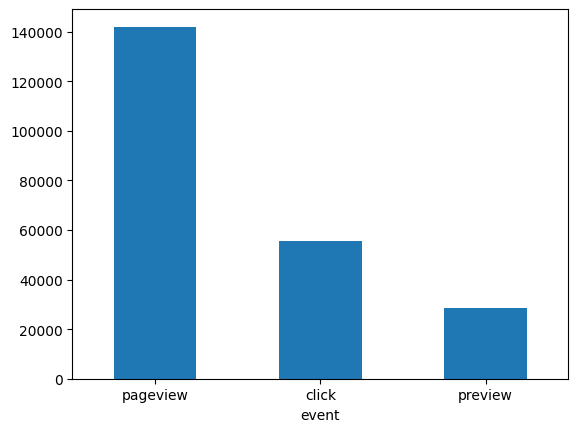

In [18]:
# distribution of different events
df.event.value_counts().plot(kind='bar', rot=0)

In [19]:
# The total count of events per day
df.groupby('date')['event'].value_counts()

date        event   
2021-08-19  pageview    22366
            click        9207
            preview      3788
2021-08-20  pageview    21382
            click        8508
            preview      4222
2021-08-21  pageview    21349
            click        8071
            preview      4663
2021-08-22  pageview    20430
            click        7854
            preview      4349
2021-08-23  pageview    18646
            click        7315
            preview      3847
2021-08-24  pageview    18693
            click        7301
            preview      3840
2021-08-25  pageview    19149
            click        7476
            preview      3822
Name: count, dtype: int64

### distribution of an individual events per day

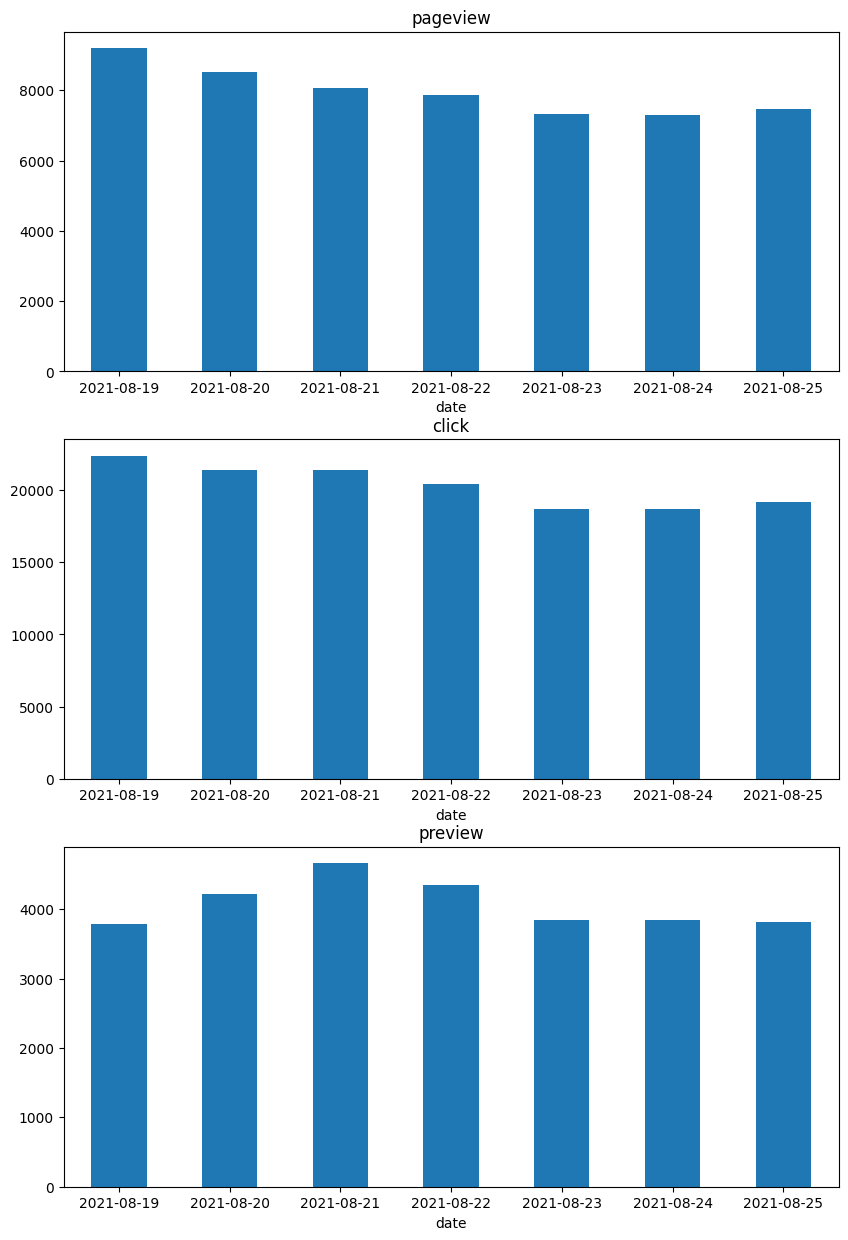

In [20]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

for i in range(3):
  df.groupby('date')['event'].value_counts().unstack(fill_value=0).iloc[:, i].plot(kind='bar', rot=0, ax=axs[i])
  axs[i].set_title(df.event.value_counts().index[i])

# plt.tight_layout()
# plt.show()

## **3. Geographical Distribution**

In [21]:
df.groupby('country')['event'].value_counts().unstack()['pageview']

,pageview
country,
Afghanistan,2.0
Albania,344.0
Algeria,443.0
American Samoa,3.0
Andorra,2.0
...,...
Wallis and Futuna,1.0
Yemen,49.0
Zambia,68.0


In [22]:
# per country contribution
df.groupby('country')['event'].value_counts().unstack()['pageview'].sort_values(ascending=False)

,pageview
country,
Saudi Arabia,28873.0
India,27286.0
United States,20839.0
France,9674.0
Iraq,4897.0
...,...
Central African Republic,1.0
Wallis and Futuna,1.0
Principality of Monaco,1.0


<Axes: xlabel='country'>

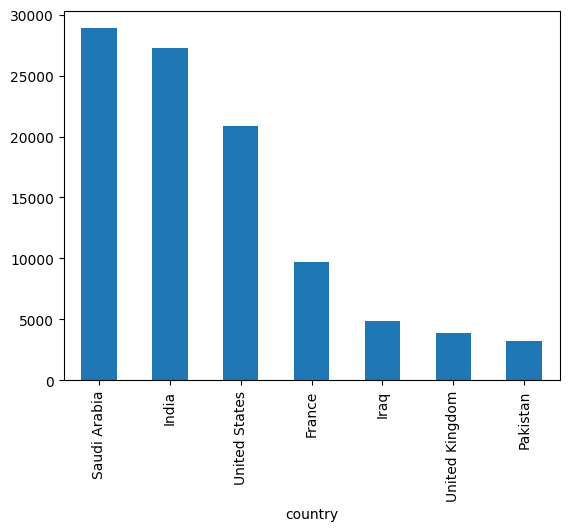

In [23]:
df.groupby('country')['event'].value_counts().unstack()['pageview'].sort_values(ascending=False).head(7).plot(kind='bar')

## **4. Click-Through Rate (CTR) Analysis**

### Overall click-through rate (CTR)

In [24]:
df.event.value_counts()

,count
event,
pageview,142015
click,55732
preview,28531


In [25]:
# overall CTR
df.event.value_counts()['click'] / df.event.value_counts()['pageview']

0.3924374185825441

### CTR across different links

In [26]:
df_ctr = df.groupby('linkid')['event'].value_counts().unstack().fillna(0).reset_index(drop=True)
df_ctr

event,click,pageview,preview
0,0.0,2.0,0.0
1,2.0,2.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
3834,1.0,1.0,0.0
3835,0.0,2.0,0.0
3836,1.0,1.0,0.0
3837,1.0,2.0,0.0


In [27]:
# calculating CTR variation across links
df_ctr['ctr_per_linkid'] = df_ctr['click'] / df_ctr['pageview']
df_ctr

event,click,pageview,preview,ctr_per_linkid
0,0.0,2.0,0.0,0.0
1,2.0,2.0,0.0,1.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
3834,1.0,1.0,0.0,1.0
3835,0.0,2.0,0.0,0.0
3836,1.0,1.0,0.0,1.0
3837,1.0,2.0,0.0,0.5


## **5. Correlation Analysis**

In [28]:
df_ctr[['click', 'preview']].corr()

event,click,preview
event,,
click,1.000000,0.988659
preview,0.988659,1.000000


In [29]:
df_ctr[['click', 'pageview']].corr()

event,click,pageview
event,,
click,1.000000,0.994001
pageview,0.994001,1.000000


<Axes: >

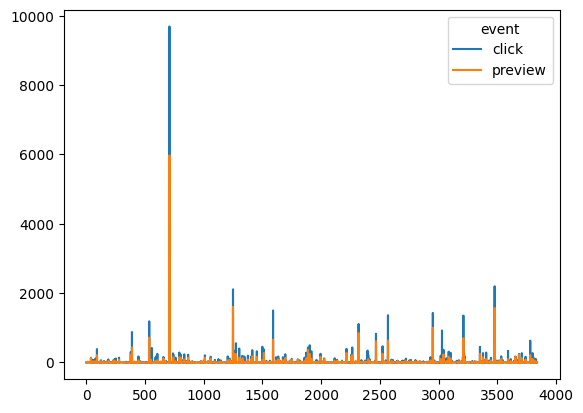

In [30]:
df_ctr[['click', 'preview']].plot(kind='line')

In [31]:
df_ctr[df_ctr['click'] > 500]

event,click,pageview,preview,ctr_per_linkid
390,878.0,2225.0,433.0,0.394607
537,1187.0,3532.0,718.0,0.336070
709,9692.0,25175.0,5974.0,0.384985
1250,2109.0,6600.0,1605.0,0.319545
1275,555.0,1222.0,244.0,0.454173
1591,1500.0,3354.0,658.0,0.447227
2319,1111.0,3407.0,849.0,0.326093
2467,827.0,2440.0,612.0,0.338934
2569,1364.0,3039.0,633.0,0.448832
2951,1429.0,4303.0,1001.0,0.332094


<Axes: xlabel='click', ylabel='preview'>

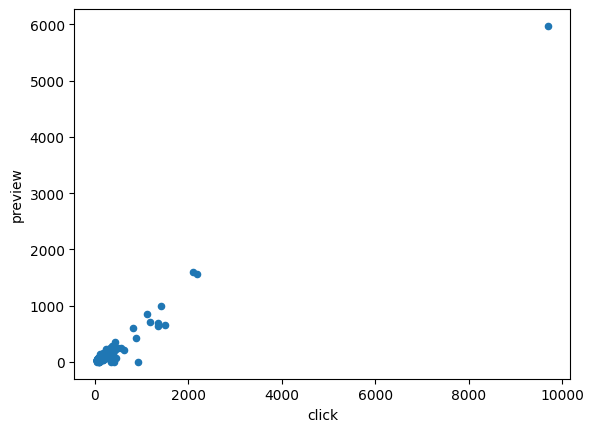

In [32]:
# Filtering out rows above certain threshold and checking out the correlation
df_ctr[df_ctr['click'] > 50][['click', 'preview']].plot(kind = 'scatter', x='click', y = 'preview')

## **Observation**
## It appears that both **click** and **preview** event shares a positive correlation.

<Axes: xlabel='click', ylabel='pageview'>

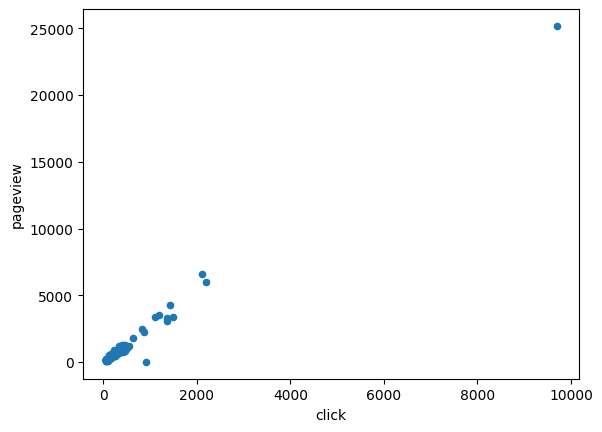

In [33]:
df_ctr[df_ctr['click'] > 50][['click', 'pageview']].plot(kind = 'scatter', x='click', y = 'pageview')

<Axes: xlabel='preview', ylabel='pageview'>

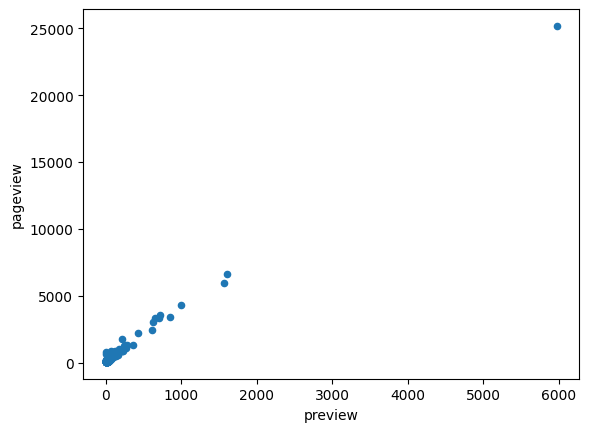

In [34]:
df_ctr[df_ctr['pageview'] > 50][['preview', 'pageview']].plot(kind = 'scatter', x='preview', y = 'pageview')

## All three events (click, pageview, preview) shows the positive correlation with each other

## **Statistical significance**

In [35]:
import pandas as pd
from scipy.stats import chi2_contingency

# Creating a contingency table
contingency_table = pd.crosstab(df_ctr['click'], df_ctr['preview'])

# Performing the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Printing the results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")

# Interpreting the results
if p < 0.05:  # Assuming a significance level of 0.05
    print("There is a significant association between the click events and the preview event.")
else:
    print("There is no significant association between the click events and the preview event.")

Chi-squared statistic: 336206.78094752796
P-value: 0.0
Degrees of freedom: 20230
Expected frequencies:
There is a significant association between the click events and the preview event.


In [36]:
# Creating a contingency table
contingency_table = pd.crosstab(df_ctr['click'], df_ctr['pageview'])

# Performing the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Printing the results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")

# Interpreting the results
if p < 0.05:  # Assuming a significance level of 0.05
    print("There is a significant association between the click events and the pageview event.")
else:
    print("There is no significant association between the click events and the pageview event.")

Chi-squared statistic: 503802.4765490345
P-value: 0.0
Degrees of freedom: 39100
Expected frequencies:
There is a significant association between the click events and the pageview event.


In [37]:
# Creating a contingency table
contingency_table = pd.crosstab(df_ctr['preview'], df_ctr['pageview'])

# Performing the Chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Printing the results
print(f"Chi-squared statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")

# Interpreting the results
if p < 0.05:  # Assuming a significance level of 0.05
    print("There is a significant association between the preview events and the pageview event.")
else:
    print("There is no significant association between the preview events and the pageview event.")

Chi-squared statistic: 376852.1493899177
P-value: 0.0
Degrees of freedom: 27370
Expected frequencies:
There is a significant association between the preview events and the pageview event.


## **Observations**
- All three events are statistically significant with each other.
- Also, it appears that these variables are maintaining the linear relationship.